# The Invasion of the Opioid Crisis on Life in the US

### A Data Science Project By Daniel Connolly and Bryce Mann

In this project, we will be investigating the opioid epidemic using data from the NSDUH. We hope to find interesting relationships between drug use and other variables measured by the NSDUH as well as the look at the use of opioids over time. In accordance with the guidelines of the NSDUH, we will not upload our data to our git repository and will not make any identifying information public through our study.

#### Reading the Data

In [1]:
import pandas as pd
import numpy as np

# Each individual year's data 2002-2017
nsduh_2002 = pd.read_pickle('nsduh_2002.pkl')
nsduh_2003 = pd.read_pickle('nsduh_2003.pkl')
nsduh_2004 = pd.read_pickle('nsduh_2004.pkl')
nsduh_2005 = pd.read_pickle('nsduh_2005.pkl')
nsduh_2006 = pd.read_pickle('nsduh_2006.pkl')
nsduh_2007 = pd.read_pickle('nsduh_2007.pkl')
nsduh_2008 = pd.read_pickle('nsduh_2008.pkl')
nsduh_2009 = pd.read_pickle('nsduh_2009.pkl')
nsduh_2010 = pd.read_pickle('nsduh_2010.pkl')
nsduh_2011 = pd.read_pickle('nsduh_2011.pkl')
nsduh_2012 = pd.read_pickle('nsduh_2012.pkl')
nsduh_2013 = pd.read_pickle('nsduh_2013.pkl')
nsduh_2014 = pd.read_pickle('nsduh_2014.pkl')
nsduh_2015 = pd.read_pickle('nsduh_2015.pkl')
nsduh_2016 = pd.read_pickle('nsduh_2016.pkl')
nsduh_2017 = pd.read_pickle('nsduh_2017.pkl')

# A few variables we were able to extract from the NSDUH's provided 2002-2016 dataset
nsduh = pd.read_pickle('nsduh_all.pkl')

In [9]:
dfs = [nsduh_2002, nsduh_2003, nsduh_2004, nsduh_2005, nsduh_2006, nsduh_2007, nsduh_2008,
       nsduh_2009, nsduh_2010, nsduh_2011, nsduh_2012, nsduh_2013, nsduh_2014, nsduh_2015,
       nsduh_2016, nsduh_2017]

#### Some Helper Functions for cleaning the data

In [2]:
## function to clean data
def clean_data(df):
    #1 = yes, 2 = no
    df.herever.replace([85,94,97], np.nan, inplace=True)
    
    #numerical age
    df.herage.replace([985,991,994,997,998], np.nan, inplace=True)
    
    #1 - within 30 days
    #2 - between 12 months and last 30 days
    #3 - more than 12 months ago
    df.irherrc.replace([9], np.nan, inplace=True)
    
    #1 = yes, 2 = no
    df.anlever.replace([-9, 97, 98], np.nan, inplace=True)
    df.anlever.replace([81,91], 2, inplace=True)
    
    #numerical age
    df.analage.replace([-9,981,985,991,994,997,998], np.nan, inplace=True)
    
    #1 - within 30 days
    #2 - between 12 months and last 30 days
    #3 - more than 12 months ago
    df.irpnrnmrec.replace([-9, 9], 2, inplace=True)
    
    #AGE2
    #1 = Respondent is 12 years old
    #2 = Respondent is 13 years old
    #3 = Respondent is 14 years old
    #4 = Respondent is 15 years old
    #5 = Respondent is 16 years old
    #6 = Respondent is 17 years old
    #7 = Respondent is 18 years old
    #8 = Respondent is 19 years old
    #9 = Respondent is 20 years old
    #10 = Respondent is 21 years old
    #11 = Respondent is 22 or 23 years old
    #12 = Respondent is 24 or 25 years old 
    #13 = Respondent is between 26 and 29 years old
    #14 = Respondent is between 30 and 34 years old 
    #15 = Respondent is between 35 and 49 years old 
    #16 = Respondent is between 50 and 64 years old 
    #17 = Respondent is 65 years old or older
    
    #irsex
    # 1 - male
    # 2 - female
    
    #IREDUHIGHST2
    #1 = Fifth grade or less grade completed ..............................................................................
    #2 = Sixth grade completed ..................................................................................................
    #3 = Seventh grade completed ..............................................................................................
    #4 = Eighth grade completed ................................................................................................
    #5 = Ninth grade completed ..................................................................................................
    #6 = Tenth grade completed ..................................................................................................
    #7 = Eleventh or Twelfth grade completed, no diploma .......................................................
    #8 = High school diploma/GED ............................................................................................
    #9 = Some college credit, but no degree ...............................................................................
    #10 = Associate's degree (for example, AA, AS) ..................................................................
    #11 = College graduate or higher .........................................................................................
    df.IREDUHIGHST2.replace([-9], np.nan, inplace=True)
    
    #respondent income: IRPINC3
#     1 = Less than $10,000 (Including Loss) ..............................................................................
#     2 = $10,000 - $19,999 .........................................................................................................
#     3 = $20,000 - $29,999 .........................................................................................................
#     4 = $30,000 - $39,999 .........................................................................................................
#     5 = $40,000 - $49,999 .........................................................................................................
#     6 = $50,000 - $74,999 .........................................................................................................
#     7 = $75,000 or more ..............................
    
    #household income: IRFAMIN3
#     1 = Less than $10,000 (Including Loss) ..............................................................................
#     2 = $10,000 - $19,999 .........................................................................................................
#     3 = $20,000 - $29,999 .........................................................................................................
#     4 = $30,000 - $39,999 .........................................................................................................
#     5 = $40,000 - $49,999 .........................................................................................................
#     6 = $50,000 - $74,999 .........................................................................................................
#     7 = $75,000 or more ..............................

    #type of area they live in
    # 1 - large metro
    # 2 - small metro
    # 3 - nonmetro
    df.COUTYP2.replace([-9], np.nan, inplace=True)
    
    #type of area they live in
    # 1 - large metro
    # 2 - small metro
    # 3 - nonmetro
    df.COUTYP4.replace([-9], np.nan, inplace=True)

In [3]:
#function that remaps binned data to more useful values
def reinterpret_data(df):
    
    #AGE2
    #1 = Respondent is 12 years old
    #2 = Respondent is 13 years old
    #3 = Respondent is 14 years old
    #4 = Respondent is 15 years old
    #5 = Respondent is 16 years old
    #6 = Respondent is 17 years old
    #7 = Respondent is 18 years old
    #8 = Respondent is 19 years old
    #9 = Respondent is 20 years old
    #10 = Respondent is 21 years old
    #11 = Respondent is 22 or 23 years old
    #12 = Respondent is 24 or 25 years old 
    #13 = Respondent is between 26 and 29 years old
    #14 = Respondent is between 30 and 34 years old 
    #15 = Respondent is between 35 and 49 years old 
    #16 = Respondent is between 50 and 64 years old 
    #17 = Respondent is 65 years old or older
    #last value corresponds to 65+
    age_list = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 25, 29, 34, 49, 64, 65]
    df.AGE2.replace(list(range(1,18)), age_list, inplace=True)
    
    #IREDUHIGHST2
    #1 = Fifth grade or less grade completed ..............................................................................
    #2 = Sixth grade completed ..................................................................................................
    #3 = Seventh grade completed ..............................................................................................
    #4 = Eighth grade completed ................................................................................................
    #5 = Ninth grade completed ..................................................................................................
    #6 = Tenth grade completed ..................................................................................................
    #7 = Eleventh or Twelfth grade completed, no diploma .......................................................
    #8 = High school diploma/GED ............................................................................................
    #9 = Some college credit, but no degree ...............................................................................
    #10 = Associate's degree (for example, AA, AS) ..................................................................
    #11 = College graduate or higher .........................................................................................
    #roughly replace these with years of education
    edu_list = [6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 18]
    df.IREDUHIGHST2.replace(list(range(1,12)), edu_list, inplace=True)
    
        #respondent income: IRPINC3
#     1 = Less than $10,000 (Including Loss) ..............................................................................
#     2 = $10,000 - $19,999 .........................................................................................................
#     3 = $20,000 - $29,999 .........................................................................................................
#     4 = $30,000 - $39,999 .........................................................................................................
#     5 = $40,000 - $49,999 .........................................................................................................
#     6 = $50,000 - $74,999 .........................................................................................................
#     7 = $75,000 or more 
    #in thousands, integers being replaced with upper bound of bin
    #80 corresponds to over 75,000
    inc_list = [10, 20, 30, 40, 50, 75, 80]
    df.IRPINC3.replace(list(range(1,8)), inc_list, inplace=True)
    
        #household income: IRFAMIN3
#     1 = Less than $10,000 (Including Loss) ..............................................................................
#     2 = $10,000 - $19,999 .........................................................................................................
#     3 = $20,000 - $29,999 .........................................................................................................
#     4 = $30,000 - $39,999 .........................................................................................................
#     5 = $40,000 - $49,999 .........................................................................................................
#     6 = $50,000 - $74,999 .........................................................................................................
#     7 = $75,000 or more ..............................
    df.IRFAMIN3.replace(list(range(1,8)), inc_list, inplace=True)
    

In [66]:
def decorate(xlabel = '', ylabel = '', title = ''):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

In [11]:
reinterpret_data(nsduh)
clean_data(nsduh)
nsduh.head()

,QUESTID2,year,herever,herage,irherrc,anlever,analage,irpnrnmrec,AGE2,irsex,IREDUHIGHST2,IRPINC3,IRFAMIN3,COUTYP2,COUTYP4
0,02000024,2002,2.0,NaN,NaN,1.0,20.0,2,29,1,NaN,75,75,1.0,NaN
1,02000239,2002,2.0,NaN,NaN,2.0,NaN,2,25,2,NaN,40,80,1.0,NaN
2,02000248,2002,2.0,NaN,NaN,1.0,20.0,2,20,1,NaN,10,10,3.0,NaN
3,02000471,2002,2.0,NaN,NaN,2.0,NaN,2,25,1,NaN,10,10,2.0,NaN
4,02000630,2002,2.0,NaN,NaN,2.0,NaN,2,64,2,NaN,10,50,2.0,NaN


These are the correct numbers!

In [27]:
import thinkstats2
import thinkplot
import matplotlib.pyplot as plt

In [67]:
d = dict()
for df in dfs:
    d[df['year'].iloc[0]] = 100*(len(df[df.herever == '1 - Yes'])/len(df))

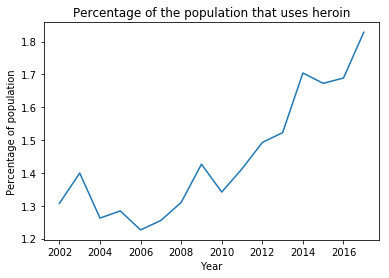

In [68]:
lists = sorted(d.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.xlabel('Year')
plt.ylabel('Percentage of population')
plt.title('Percentage of the population that uses heroin')
plt.show()

This plot shows that heroin use is increasing, albeit by a pretty insignificant amount, since 2002.

In [69]:
grouped2 = nsduh.groupby('AGE2')

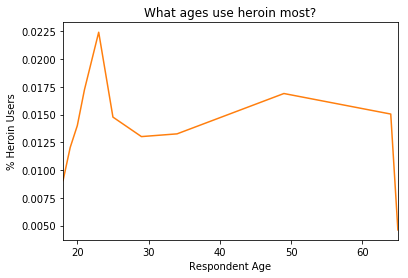

In [70]:
series = 2 - grouped2['herever'].mean()
series.plot(color='C1')
decorate(xlabel='Respondent Age', 
         ylabel='% Heroin Users',
         title='What ages use heroin most?')

Average heroin use peaks in the early twenties.

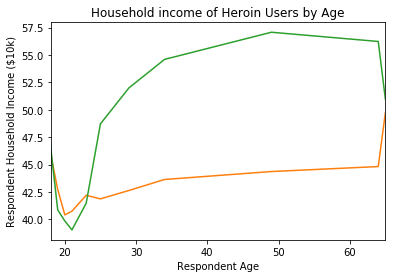

In [71]:
users = nsduh[nsduh.herever == 1]
non_users = nsduh[nsduh.herever == 2]
grouped3 = users.groupby('AGE2')
series1 = grouped3['IRFAMIN3'].mean()
series1.plot(color='C1', label='users')
grouped3 = non_users.groupby('AGE2')
series2 = grouped3['IRFAMIN3'].mean()
series2.plot(color='C2', label='non_users')
decorate(xlabel='Respondent Age', 
         ylabel='Respondent Household Income ($10k)',
         title='Household income of Heroin Users by Age')

This plot looks interesting. The household incomes of all respondents dips in the late teens and early twenties, but then the users and non-users diverge. The users household incomes greatly increase, while the users household incomes only barely continue rising.

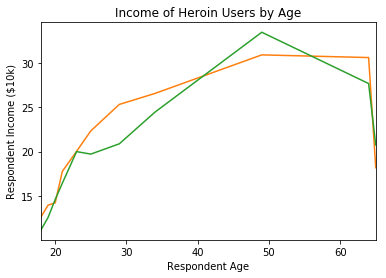

In [72]:
grouped3 = users.groupby('AGE2')
series1 = grouped3['IRPINC3'].mean()
series1.plot(color='C1', label='users')
grouped3 = non_users.groupby('AGE2')
series2 = grouped3['IRPINC3'].mean()
series2.plot(color='C2', label='non_users')
decorate(xlabel='Respondent Age', 
         ylabel='Respondent Income ($10k)',
         title='Income of Heroin Users by Age')

The Personal incomes of the users and non-users track each other though.

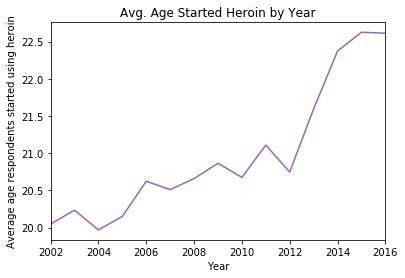

In [73]:
grouped3 = users.groupby('year')
series1 = grouped3['herage'].mean()
series1.plot(color='C4', label='users')
decorate(xlabel='Year', 
         ylabel='Average age respondents started using heroin',
         title='Avg. Age Started Heroin by Year')

The average age of people starting to use heroin has jumped by 2 years between 2002 and 2014.

In [75]:
from thinkplot import Cdf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

from thinkstats2 import Pmf, Cdf

import thinkstats2
import thinkplot
ps = [95, 75, 50, 25, 5]
res = []
grouped3 = users.groupby('year')
for name, group in grouped3['herage']:
    percentiles = Cdf(group).Percentiles(ps)
    print(name)
    res.append(percentiles)
xs = grouped3.groups.keys()
xs = sorted(xs)
rows = np.transpose(res)

2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


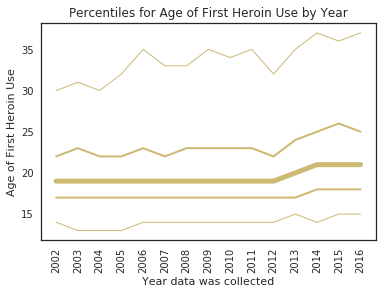

In [79]:
width = [1,2,5,2,1]

for i, qs in enumerate(rows):
    plt.plot(xs, qs, label=ps[i], linewidth=width[i], color='C4')
    
decorate(xlabel='Year data was collected',
         ylabel='Age of First Heroin Use',
         title='Percentiles for Age of First Heroin Use by Year')
plt.xticks(rotation=90)
plt.show()

All percentiles were pretty steady until 2012, when they began to increase in heroin use a little bit.

In [80]:
for df in dfs:
    df.hermfu.replace([85,89,91,94,97,98,99], np.nan, inplace=True) 
    df.NMERTMT2.replace([985,994,997,998], np.nan, inplace=True)

**To use more later maybe, grouping by heroin and other opoid use**

In [99]:
grouped = nsduh.groupby(['herever', 'anlever'])
grouped2 = nsduh.groupby(['year','herever'])
df4 = grouped2.get_group(('2015',1.0))
df5 = grouped2.get_group(('2016',1.0))
df1 = grouped.get_group((1.0,1.0))
df2 = grouped.get_group((2.0,1.0))
df3 = grouped.get_group((1.0,2.0))
users = pd.concat([df1, df2, df3, df4, df5])
time_users = users.groupby('year')
non_users = grouped.get_group((2.0,2.0))

In [102]:
d_her = dict()
d_an = dict()
for x in list(range(2002,2017)):
    df = time_users.get_group(str(x))
    her_val = sum(df['herage'].dropna())/len(df['herage'].dropna())
    if x<=2014:
        an_val = sum(df['analage'].dropna())/len(df['analage'].dropna())
        d_an[x] = an_val
    d_her[x] = her_val

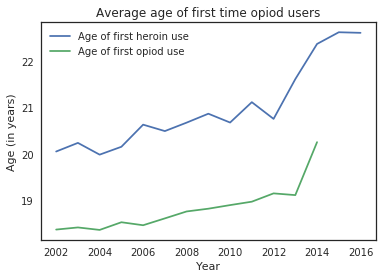

In [105]:
plt.plot(list(d_her.keys()),list(d_her.values()),label='Age of first heroin use')
plt.plot(list(d_an.keys()),list(d_an.values()), label='Age of first opiod use')
decorate(xlabel='Year',ylabel='Age (in years)',
         title='Average age of first time opiod users')
plt.legend()
plt.show()

**Looking at areas people live in**

In [82]:
urban = nsduh[(nsduh.COUTYP2 == 1) | (nsduh.COUTYP4 == 1)]
suburb = nsduh[(nsduh.COUTYP2 == 2) | (nsduh.COUTYP4 == 2)]
rural = nsduh[(nsduh.COUTYP2 == 3) | (nsduh.COUTYP4 == 3)]

In [83]:
rural.COUTYP4.mean()

3.0

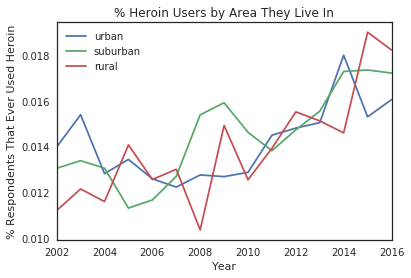

In [87]:
grouped3 = urban.groupby('year')
series1 = 2- grouped3['herever'].mean()
series1.plot(label='urban')
grouped4 = suburb.groupby('year')
series2 = 2 - grouped4['herever'].mean()
series2.plot(label='suburban')
grouped5 = rural.groupby('year')
series3 = 2 - grouped5['herever'].mean()
series3.plot(label='rural')
decorate(xlabel='Year', 
         ylabel='% Respondents That Ever Used Heroin',
         title='% Heroin Users by Area They Live In')
plt.legend()
plt.show()

Not much to see here. The areas show no significant differences.

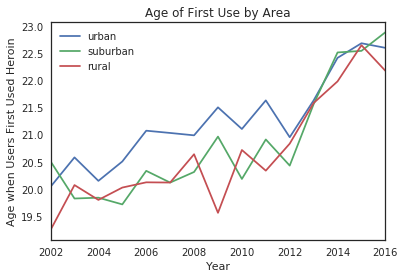

In [89]:
grouped3 = urban.groupby('year')
series1 = grouped3['herage'].mean()
series1.plot(label='urban')
grouped4 = suburb.groupby('year')
series2 = grouped4['herage'].mean()
series2.plot(label='suburban')
grouped5 = rural.groupby('year')
series3 = grouped5['herage'].mean()
series3.plot(label='rural')
decorate(xlabel='Year', 
         ylabel='Age when Users First Used Heroin',
         title='Age of First Use by Area')
plt.legend()
plt.show()

The age of first use is rising everywhere.

In [90]:
urban_users = users[(users.COUTYP2 == 1) | (users.COUTYP4 == 1)]
suburb_users = users[(users.COUTYP2 == 2) | (users.COUTYP4 == 2)]
rural_users = users[(users.COUTYP2 == 3) | (users.COUTYP4 == 3)]
urban_nonusers = non_users[(non_users.COUTYP2 == 1) | (non_users.COUTYP4 == 1)]
suburb_nonusers = non_users[(non_users.COUTYP2 == 2) | (non_users.COUTYP4 == 2)]
rural_nonusers = non_users[(non_users.COUTYP2 == 3) | (non_users.COUTYP4 == 3)]

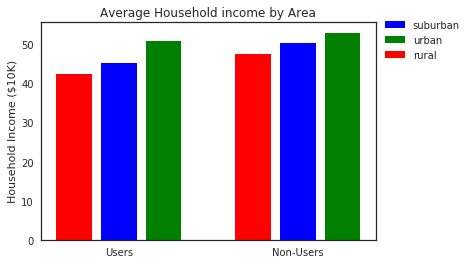

In [95]:
ax = plt.subplot(111)
ax.bar(0, suburb_users['IRFAMIN3'].mean(),width=0.2,color='b',align='center')
ax.bar(0.25, urban_users['IRFAMIN3'].mean(),width=0.2,color='g',align='center')
ax.bar(-0.25, rural_users['IRFAMIN3'].mean(),width=0.2,color='r',align='center')
ax.bar(1, suburb_nonusers['IRFAMIN3'].mean(),width=0.2,color='b',align='center')
ax.bar(1.25, urban_nonusers['IRFAMIN3'].mean(),width=0.2,color='g',align='center')
ax.bar(.75, rural_nonusers['IRFAMIN3'].mean(),width=0.2,color='r',align='center')
ax.legend(('suburban', 'urban', 'rural'),bbox_to_anchor=(1, 1.05))

ax.set_ylabel('Household Income ($10K)')
ax.set_xticks([0,1])
ax.set_xticklabels(('Users', 'Non-Users'))
ax.set_title('Average Household income by Area')

plt.show()

Users and non-users are pretty similar here.

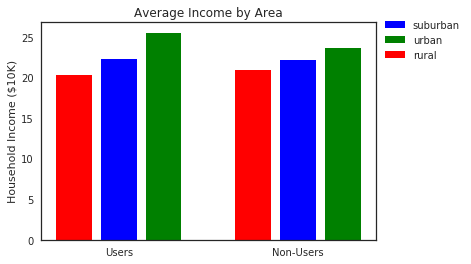

In [96]:
ax = plt.subplot(111)
ax.bar(0, suburb_users['IRPINC3'].mean(),width=0.2,color='b',align='center')
ax.bar(0.25, urban_users['IRPINC3'].mean(),width=0.2,color='g',align='center')
ax.bar(-0.25, rural_users['IRPINC3'].mean(),width=0.2,color='r',align='center')
ax.bar(1, suburb_nonusers['IRPINC3'].mean(),width=0.2,color='b',align='center')
ax.bar(1.25, urban_nonusers['IRPINC3'].mean(),width=0.2,color='g',align='center')
ax.bar(.75, rural_nonusers['IRPINC3'].mean(),width=0.2,color='r',align='center')
ax.legend(('suburban', 'urban', 'rural'), bbox_to_anchor=(1, 1.05))

ax.set_ylabel('Household Income ($10K)')
ax.set_xticks([0,1])
ax.set_xticklabels(('Users', 'Non-Users'))
ax.set_title('Average Income by Area')

plt.show()

Users and non-users are, again, fairly similar.

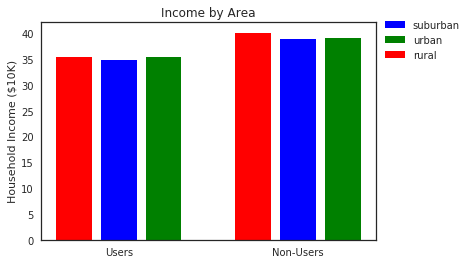

In [97]:
ax = plt.subplot(111)
ax.bar(0, suburb_users['AGE2'].mean(),width=0.2,color='b',align='center')
ax.bar(0.25, urban_users['AGE2'].mean(),width=0.2,color='g',align='center')
ax.bar(-0.25, rural_users['AGE2'].mean(),width=0.2,color='r',align='center')
ax.bar(1, suburb_nonusers['AGE2'].mean(),width=0.2,color='b',align='center')
ax.bar(1.25, urban_nonusers['AGE2'].mean(),width=0.2,color='g',align='center')
ax.bar(.75, rural_nonusers['AGE2'].mean(),width=0.2,color='r',align='center')
ax.legend(('suburban', 'urban', 'rural'), bbox_to_anchor=(1, 1.05))

ax.set_ylabel('Household Income ($10K)')
ax.set_xticks([0,1])
ax.set_xticklabels(('Users', 'Non-Users'))
ax.set_title('Income by Area')

plt.show()

Non-Users have higher household incomes across the board, regardless of where they are from.